In [1]:
import cymetric
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:

from cymetric import graphs
from cymetric import timeseries

In [3]:
ev = cymetric.Evaluator(cymetric.dbopen("enrichment.h5"))

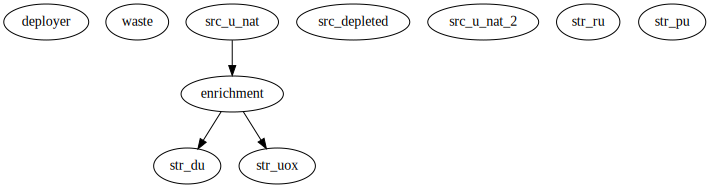

In [4]:
graphs.flow_graph(ev)

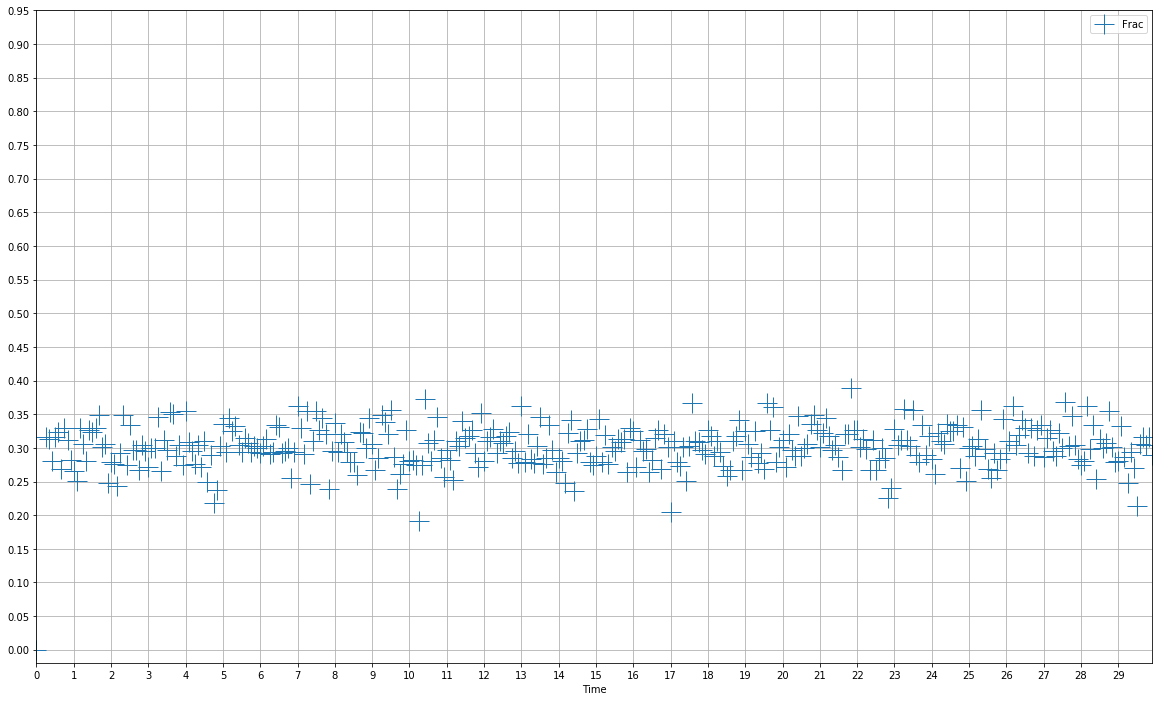

In [5]:
tail_u8_trans = timeseries.transactions(ev, receivers=["str_du"], nucs=['238U'])
tail_u5_trans = timeseries.transactions(ev, receivers=["str_du"], nucs=['235U'])
tail_u5_frac = pd.DataFrame()
tail_u5_frac['Time'] = tail_u5_trans['Time']/12.
tail_u5_frac['Frac'] = tail_u5_trans['Mass'] / (tail_u8_trans['Mass']+tail_u5_trans['Mass']) *100.
tail_u5_frac.loc[-1] = [0,0]
tail_u5_frac.index = tail_u5_frac.index+1
tail_u5_frac = tail_u5_frac.sort_index()



ax = tail_u5_frac.plot('Time','Frac',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
import numpy as np
major_y_ticks = np.arange(0, 1, 0.05)

ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 30, 1)
ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()


#u5_frac.plot(x=u5_frac.Time, y=u5_frac.Mass)

##### 

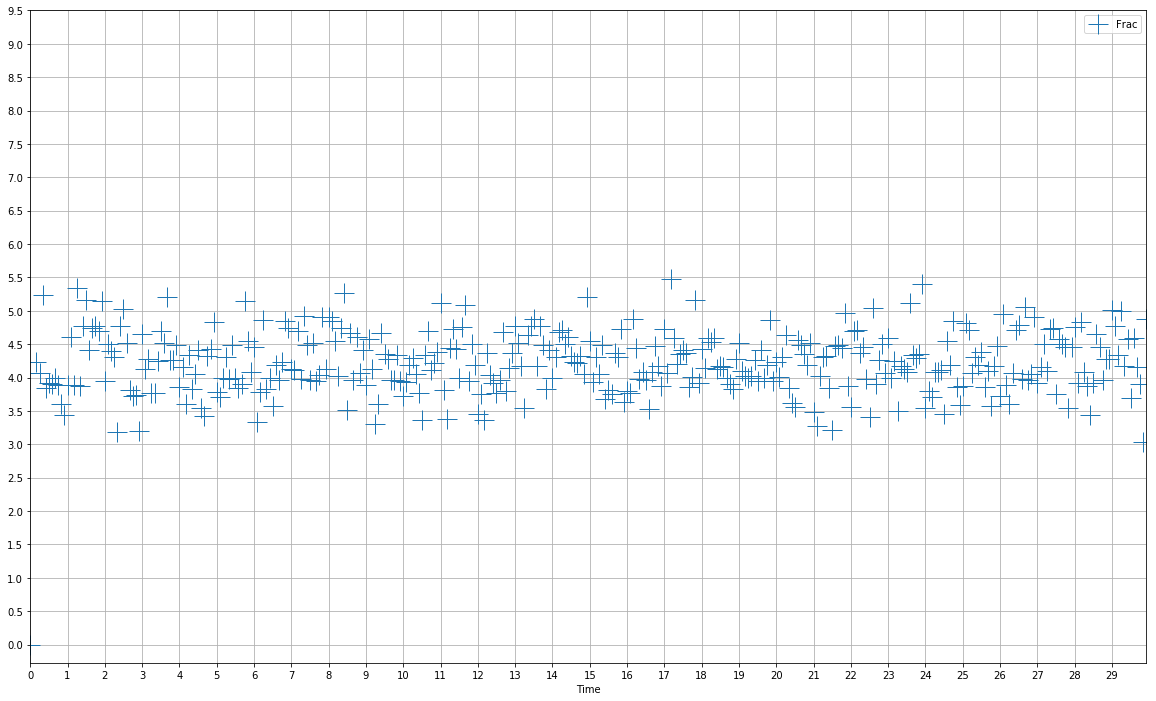

In [6]:
prod_u8_trans = timeseries.transactions(ev, receivers=["str_uox"], nucs=['238U'])
prod_u5_trans = timeseries.transactions(ev, receivers=["str_uox"], nucs=['235U'])
prod_u5_frac = pd.DataFrame()
prod_u5_frac['Time'] = prod_u5_trans['Time']/12.
prod_u5_frac['Frac'] = prod_u5_trans['Mass'] / (prod_u8_trans['Mass']+prod_u5_trans['Mass']) *100.
prod_u5_frac.loc[-1] = [0,0]
prod_u5_frac.index = prod_u5_frac.index+1
prod_u5_frac = prod_u5_frac.sort_index()


ax = prod_u5_frac.plot('Time','Frac',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
import numpy as np
major_y_ticks = np.arange(0, 10, .5)

ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 30, 1)
ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()


#u5_frac.plot(x=u5_frac.Time, y=u5_frac.Mass)

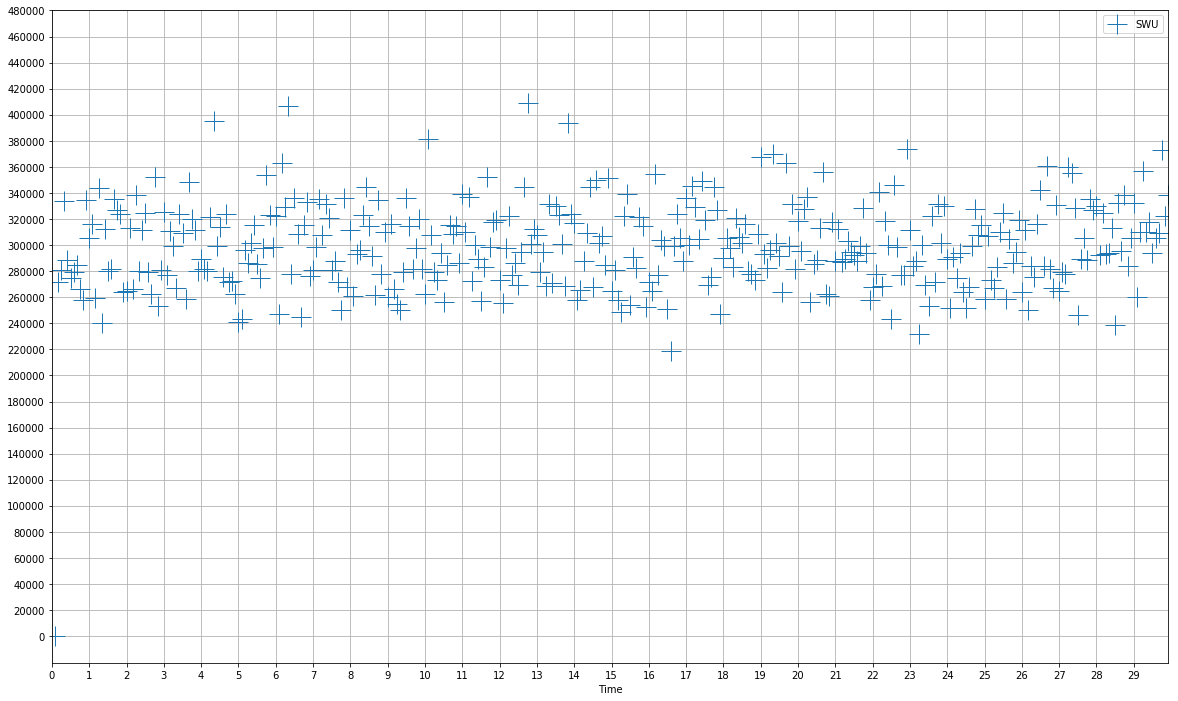

In [25]:
SWU_raw = ev.eval('TimeSeriesEnrichmentSWU')
SWU = pd.DataFrame()
SWU['Time'] = SWU_raw['Time']/12.
SWU['SWU'] = SWU_raw['Value']

ax = SWU.plot('Time','SWU',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
import numpy as np
major_y_ticks = np.arange(0, 500000, 20000)

ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 30, 1)
ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()


#u5_frac.plot(x=u5_frac.Time, y=u5_frac.Mass)